In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

In [2]:
n = 36
z = 1
n1, n2, n5, n8, n11, n17, n35 = 6, 9, 22, 24, 26, 60, 37

In [3]:
f = np.zeros(n)
f[1], f[2], f[5], f[8], f[11], f[17], f[35] = n1, n2, n5, n8, n11, n17, n35
f /= np.sum(f)

In [4]:
p = lambda d: n / (n + z) / (d + 1)
p_g = 1 - f @ p(np.arange(n))

In [5]:
c = np.vectorize(lambda l: f[l:] @ p(np.arange(l, n)))
Q = np.append(c(np.arange(1, n)), -p_g)
x = np.roots(Q)
r = 1 / x

In [6]:
V = np.vander(x)
mu = -np.ones(n - 1) @ np.linalg.inv(V)
mu_real = -np.real(np.exp(np.sum(np.log((1 - x[:-1]) / (x[-1] - x[:-1])))))  # Quick leading term

In [7]:
q = np.vectorize(lambda k: 1 + np.real(mu @ r ** k))

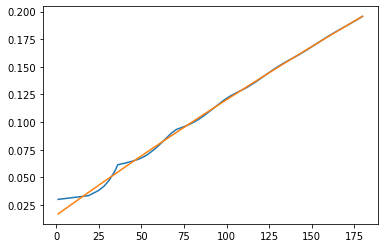

In [8]:
k = np.arange(1, 5 * n + 1)
q_k = q(k)

plt.plot(k, q_k)
plt.plot(k, 1 + mu_real * np.real(r[-1]) ** k)
plt.show()

In [9]:
float(q(1)), z / (n + z) / p_g

(0.030021210637961038, 0.03002121063795073)

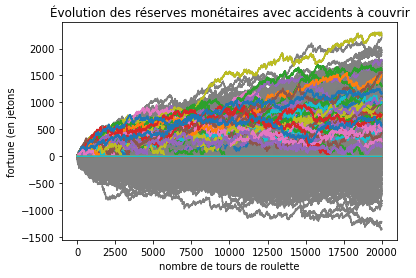

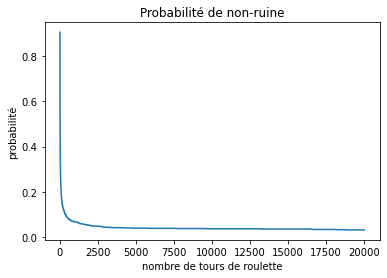

In [10]:
u0 = 1
M = 1000  # Nombre de trajectoires
N = 20000 # Nombre de tours de roulette
dS = np.random.choice(np.arange(-1, n), size=(M, N), replace=True, p=np.append(p_g, f * p(np.arange(n))))
u = u0 - np.cumsum(dS, axis=1)
u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
u_cutted = u*(u_alive)
phi = np.mean(u_alive, axis=0)

plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("nombre de tours de roulette")
plt.ylabel("fortune (en jetons")
plt.plot(u.T, c='gray')
plt.plot(u_cutted.T)
plt.show()
plt.title("Probabilité de non-ruine")
plt.xlabel("nombre de tours de roulette")
plt.ylabel("probabilité")
plt.plot(phi)
plt.show()

In [11]:
phi[-1]

0.032